## Deep neural network

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


Activate Convolutional Networks

In [2]:
conv = True

Load the cifar10 data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
NUM_CLASSES = 10

Show the first 9 images from the dataset

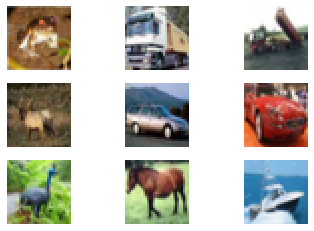

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

Image data are integers between 255 and 0 - for the neural network we need a data range from -1 to 1

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

The integer labeling of the images needs to be changed into one-hot-encoded vectors

In [8]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## Building the model

The Functional API of Keras is being used to build the model.
We are using three different types of layer: <b>Input, Flatten, Dense</b>

The <b>Input</b> layer which is basically our entry point into the network. The network is being told the shape of each data element to expect as a tuple (32, 32, 3)

The <b>Flatten</b> layer which flattens our data into a vector of length 3072 (32 x 32 x 3). This is needed as the subsequent layer needs a flat input rather than a multidimensional array.

The <b>Dense</b> layer which is the most fundamental layer in any neural network. It contains a certain number of units densely connected by a single connection carrying a weight. The output from a given unit is the weighted sum of the input it receives from the previous layer, passed through an activation function ('relu') before being sent to the next layer. This activation function is critical to ensure the neural network can learn complex functions.

### Activation functions

- The <i>ReLU</i> activation function is defined to be zero if the input is negative and is otherwise equal to the input.
- The <i>LeakyReLU</i> activation function is almost the same as the ReLU, but returns a proportional negative number if the input is less than zero
- The <i>sigmoid</i> activation is useful for binary classification problems with one output unit or multilabel classification problems
- the <i>softmax</i> activation if one needs the total sum of the output from the layer to equal 1 (multiclass classification problems where each observation only belongs to exactly one class)

In [9]:
if conv:
    pass
else:
    input_layer = Input(shape=(32, 32, 3))

    x = Flatten()(input_layer)

    x = Dense(units=200, activation='relu')(x)
    x = Dense(units=150, activation='relu')(x)

    output_layer = Dense(units=10, activation='softmax')(x)

    model = Model(input_layer, output_layer)

## Compiling the model

Here we compile the model with an optimizer (Adam) and a loss function.

The most commonly used loss functions are <i>mean squared loss</i> used to solve a regression problem (the output is continuous). If one is working on a classification problem where each observation only belongs to one class, use the <i>categorical cross-entropy</i>. And at last, if one is working on a binary classification problem with one output unit or a multilabel problem where each observation can belong to multiple classes, use <i>binary cross-entropy</i>

In [10]:
if conv:
    pass
else:
    opt = Adam(lr=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Training the model

In [11]:
if conv:
    pass
else:
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

In [12]:
if conv:
    pass
else:
    model.summary()

## Evaluating the model

In [13]:
if conv:
    pass
else:
    model.evaluate(x_test, y_test)

We can view some of the predictions on the test set by using the predict method

In [14]:
if conv:
    pass
else:
    CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

    preds = model.predict(x_test)
    preds_single = CLASSES[np.argmax(preds, axis=-1)]
    actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [15]:
if conv:
    pass
else:
    preds.shape

In [16]:
if conv:
    pass
else:
    preds_single.shape

In [17]:
if conv:
    pass
else:
    n_to_show = 10

    indices = np.random.choice(range(len(x_test)), n_to_show)

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, idx in enumerate(indices):
        img = x_test[idx]
        ax = fig.add_subplot(1, n_to_show, i+1)
        ax.axis('off')
        ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
        ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
        ax.imshow(img)

## Improving the model

The spatial structure of the pictures is not taken into account, hence the poor result. To get better result we can use a <i>convolutional</i> layer.

In [18]:
if conv:
    import tensorflow as tf
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)

        except RuntimeError as e:
            print(e)
else:
    pass

In [24]:
if conv:
    input_layer = Input((32, 32, 3))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(rate=0.5)(x)

    x = Dense(NUM_CLASSES)(x)
    output_layer = Activation('softmax')(x)

    model = Model(input_layer, output_layer)
else:
    pass

In [25]:
if conv:
    opt = Adam(lr=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
else:
    pass

In [26]:
if conv:
    model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)
else:
    pass

Epoch 1/10
50000/50000 [==============================] - 13s 250us/step - loss: 1.5555 - accuracy: 0.4543
Epoch 2/10
50000/50000 [==============================] - 12s 233us/step - loss: 1.1467 - accuracy: 0.5961
Epoch 3/10
50000/50000 [==============================] - 12s 230us/step - loss: 0.9937 - accuracy: 0.6536
Epoch 4/10
50000/50000 [==============================] - 12s 238us/step - loss: 0.9063 - accuracy: 0.6865
Epoch 5/10
50000/50000 [==============================] - 11s 229us/step - loss: 0.8482 - accuracy: 0.7018
Epoch 6/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.7952 - accuracy: 0.7237
Epoch 7/10
50000/50000 [==============================] - 12s 234us/step - loss: 0.7483 - accuracy: 0.7379
Epoch 8/10
50000/50000 [==============================] - 12s 231us/step - loss: 0.7086 - accuracy: 0.7514
Epoch 9/10
50000/50000 [==============================] - 12s 233us/step - loss: 0.6769 - accuracy: 0.7638
Epoch 10/10
50000/50000 [============

In [27]:
if conv:
    model.summary()
else:
    pass

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0   

In [28]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 61us/step


[0.8185678541660308, 0.7174000144004822]